<a href="https://colab.research.google.com/github/nagaditya39/Autoencoder-Classifier/blob/main/2Stacked_AE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import random
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Model,Sequential

In [ ]:
train,test = pd.read_csv('/content/mnist_train.csv'),pd.read_csv('/content/mnist_test.csv')

x_train = train.drop('label',axis=1)
y_train = train['label']

x_test = test.drop('label',axis=1)
y_test = test['label']
x_test = x_test /255.0
x_train = x_train /255.0
print(x_train.shape)
print(x_test.shape)
autoencoder.summary()

input_layer = Input(shape=784)

encode1 = Dense(256, activation = 'relu')(input_layer)
encode2 = Dense(128, activation ='relu')(encode1)
encoded_output = Dense(64, activation ='relu')(encode2)
decode1 = Dense(128, activation ='relu')(encoded_output)
decode2 = Dense(256, activation ='relu')(decode1)
outputLayer = Dense(784, activation = 'sigmoid')(decode2)

autoencoder = Model(input_layer, outputLayer)

autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.fit(x_train,x_train,epochs=10, batch_size=256,shuffle=True,validation_data=(x_test,x_test))


(60000, 784)
(10000, 784)
Model: "model_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 784)]             0         
                                                                 
 dense_43 (Dense)            (None, 256)               200960    
                                                                 
 dense_44 (Dense)            (None, 128)               32896     
                                                                 
 dense_45 (Dense)            (None, 64)                8256      
                                                                 
 dense_46 (Dense)            (None, 128)               8320      
                                                                 
 dense_47 (Dense)            (None, 256)               33024     
                                                                 
 dense_48 (Dense)            (No

In [ ]:
encoderModel = Model(input_layer,encoded_output)

encodedFeaturesTrain = encoderModel.predict(x_train)
encodedFeaturesTest = encoderModel.predict(x_test)

313/313 [==============================] - 1s 3ms/step


In [ ]:
print("encoded train shape: ",encodedFeaturesTrain.shape)
print("encoded test shape: ",encodedFeaturesTest.shape)


encoded train shape:  (60000, 64)
encoded test shape:  (10000, 64)


In [ ]:
classifier = Sequential([
        Dense(64, activation ='relu'),
        Dense(32, activation ='relu'),
        Dense(10, activation ='softmax')
    ])

classifier.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
classifier.fit(encodedFeaturesTrain,y_train, epochs=10, batch_size=256,shuffle=True,validation_data=(encodedFeaturesTest,y_test))


Epoch 1/10
235/235 [==============================] - 2s 5ms/step - loss: 1.6739 - accuracy: 0.5572 - val_loss: 0.6198 - val_accuracy: 0.8115
Epoch 2/10
235/235 [==============================] - 1s 3ms/step - loss: 0.4915 - accuracy: 0.8511 - val_loss: 0.3800 - val_accuracy: 0.8844
Epoch 3/10
235/235 [==============================] - 1s 3ms/step - loss: 0.3600 - accuracy: 0.8928 - val_loss: 0.3153 - val_accuracy: 0.9009
Epoch 4/10
235/235 [==============================] - 1s 3ms/step - loss: 0.3059 - accuracy: 0.9076 - val_loss: 0.2727 - val_accuracy: 0.9171
Epoch 5/10
235/235 [==============================] - 1s 3ms/step - loss: 0.2731 - accuracy: 0.9193 - val_loss: 0.2502 - val_accuracy: 0.9221
Epoch 6/10
235/235 [==============================] - 1s 3ms/step - loss: 0.2466 - accuracy: 0.9260 - val_loss: 0.2229 - val_accuracy: 0.9326
Epoch 7/10
235/235 [==============================] - 1s 3ms/step - loss: 0.2225 - accuracy: 0.9330 - val_loss: 0.2144 - val_accuracy: 0.9355
Epoch 

1/1 [==============================] - 0s 22ms/step


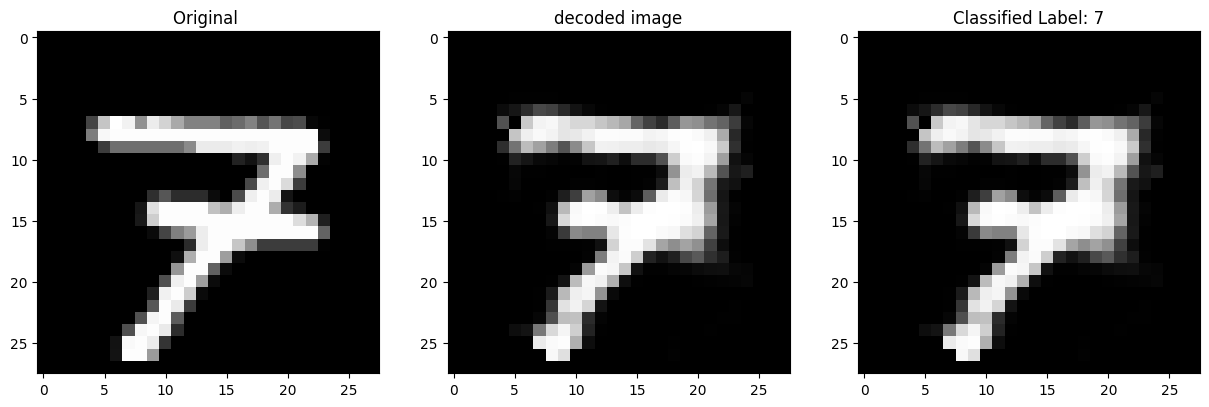

In [ ]:
image_num =random.randint(0,784)
rand_img = x_test.iloc[image_num].values.reshape(28,28)

fig = plt.figure(figsize = (15,5))

plt.subplot(1,3,1)
plt.imshow(rand_img,cmap='gray')
plt.title("Original ")

decoded_img = autoencoder.predict(rand_img.reshape(1,-1))

decoded_img = decoded_img.reshape(28,28)
plt.subplot(1,3,2)
plt.imshow(decoded_img,cmap='gray')
plt.title("decoded image")



encoded_feature = encoderModel.predict(rand_img.reshape(1,-1))

predict = np.argmax(classifier.predict(encoded_feature))
classL= str(predict)
plt.subplot(1,3,3)
plt.imshow(decoded_img,cmap='gray')
plt.title("Classified Label: "+ classL)
plt.show()


